In [67]:
# Scikit-Learn packages
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV

#Computation and Visualization Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import randint
plt.style.use('ggplot')

In [68]:
#Import the PIMA Indians Datasets
df = pd.read_csv('PIMA-Indians-Datasets.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnancies    768 non-null int64
glucose        768 non-null int64
diastolic      768 non-null int64
triceps        768 non-null float64
insulin        768 non-null float64
bmi            768 non-null float64
dpf            768 non-null float64
age            768 non-null int64
diabetes       768 non-null int64
dtypes: float64(4), int64(5)
memory usage: 54.1 KB


In [69]:
df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35.00000,155.548223,33.6,0.627,50,1
1,1,85,66,29.00000,155.548223,26.6,0.351,31,0
2,8,183,64,29.15342,155.548223,23.3,0.672,32,1
3,1,89,66,23.00000,94.000000,28.1,0.167,21,0
4,0,137,40,35.00000,168.000000,43.1,2.288,33,1


In [70]:
df.tail()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
763,10,101,76,48.00000,180.000000,32.9,0.171,63,0
764,2,122,70,27.00000,155.548223,36.8,0.340,27,0
765,5,121,72,23.00000,112.000000,26.2,0.245,30,0
766,1,126,60,29.15342,155.548223,30.1,0.349,47,1
767,1,93,70,31.00000,155.548223,30.4,0.315,23,0


In [71]:
#Feature and Target Arrays
X = df.drop(['diabetes'], axis=1).values
y = df.diabetes.values
# Create training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [72]:
#KNN Classifier on the dataset
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [73]:
# Generating the confusion matrix and classification report for KNN Classifier
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[176  30]
 [ 52  50]]
             precision    recall  f1-score   support

          0       0.77      0.85      0.81       206
          1       0.62      0.49      0.55       102

avg / total       0.72      0.73      0.72       308



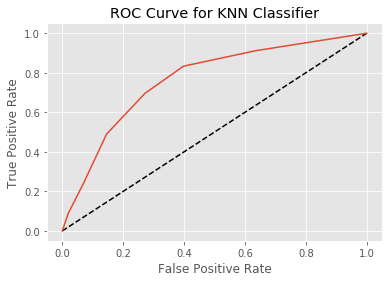

AUC: 0.763825433086
AUC scores computed using 5-fold cross-validation: [ 0.72648148  0.70962963  0.77925926  0.82669811  0.78150943]


In [74]:
#ROC Curve for KNN Classifier
y_pred_prob = knn.predict_proba(X_test)[:,1]
fpr_roc, tpr_roc, thresholds_roc = roc_curve(y_test, y_pred_prob)

# ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_roc, tpr_roc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN Classifier')
plt.show()

#Area under the ROC Curve
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))
cv_auc = cross_val_score(knn, X, y, cv=5, scoring='roc_auc')
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

In [75]:
#LR Classifier on the same dataset
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [76]:
# Generating the confusion matrix and classification report for KNN Classifier
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[176  30]
 [ 35  67]]
             precision    recall  f1-score   support

          0       0.83      0.85      0.84       206
          1       0.69      0.66      0.67       102

avg / total       0.79      0.79      0.79       308



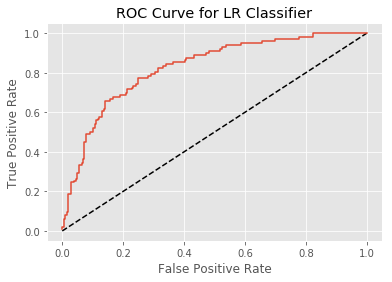

AUC: 0.825480677708
AUC scores computed using 5-fold cross-validation: [ 0.80185185  0.80740741  0.81481481  0.86245283  0.8554717 ]


In [77]:
#ROC Curve for LR Classifier
y_pred_prob = logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for LR Classifier')
plt.show()

#Area under the ROC Curve
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))
cv_auc = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

# HyperParameter Tuning for LR - GridSearchCV

In [78]:
# hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Instantiating the GridSearchCV 
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)
logreg_cv.fit(X, y)

# tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))


Tuned Logistic Regression Parameters: {'C': 3.7275937203149381}
Best score is 0.770833333333


# HyperParameter Tuning for LR - RandomizedSearchCV

GridSearchCV can be computationally expensive, especially if you are searching over a large hyperparameter space and dealing with multiple hyperparameters. A solution to this is to use RandomizedSearchCV, in which not all hyperparameter values are tried out. Instead, a fixed number of hyperparameter settings is sampled from specified probability distributions. You'll practice using RandomizedSearchCV in this exercise and see how this works.

In [79]:
param_dist = {"max_depth": [3, None], "max_features": randint(1, 9), "min_samples_leaf": randint(1, 9), 
              "criterion": ["gini", "entropy"]}
tree = DecisionTreeClassifier()

# Instantiating the RandomizedSearchCV object
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)
tree_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'max_features': 8, 'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 5}
Best score is 0.734375
